#### Jupyter Notebook for inital importing, merging and cleaning of the demographic data. Used to produce cleaned_census.csv

##### Made by Efim Sokolov

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
census = gpd.read_file('../data/census_block_groups/2020_Census_Block_Groups_in_Boston.shp')

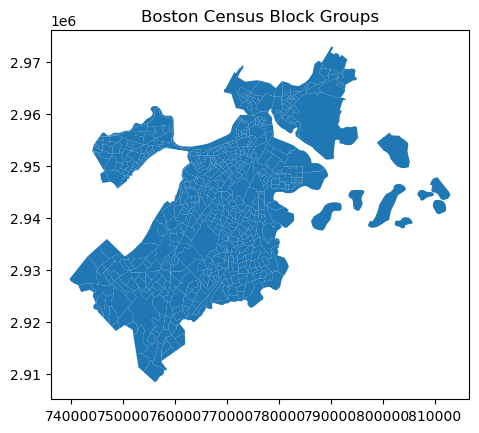

In [3]:
census.plot()
plt.title('Boston Census Block Groups')
plt.show()

In [4]:
gdata = pd.read_csv("../data/census-block-group-data.csv")
# gdata.rename(columns=)
cols = "field concept,State/US-Abbreviation (USPS),Summary Level,Geographic Record Identifier,Geographic Code Identifier,Region,Division,State (FIPS),County (FIPS),County Subdivision (FIPS),Census Tract,Block Group,GEOID 2020 block group,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total:,Institutionalized population:,Correctional facilities for adults,Juvenile facilities,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant"\
        .split(",")
mapper = {old: new for old, new in zip(gdata.columns, cols)}
gdata.rename(columns=mapper, inplace=True)

In [5]:
gdata["geoid20"] = gdata["Geographic Record Identifier"].str.split("US").apply(lambda x: x[1])
census_combined = census.merge(gdata, on="geoid20")
census_combined["Black or African American alone"]
census_unique = census_combined.loc[:,~census_combined.columns.duplicated()].copy() # make new dataframe with unique columns names
census_unique["Black or African American alone"]

0       78
1       39
2       41
3        0
4       32
      ... 
575    151
576    441
577     60
578     50
579    218
Name: Black or African American alone, Length: 580, dtype: int64

<Axes: >

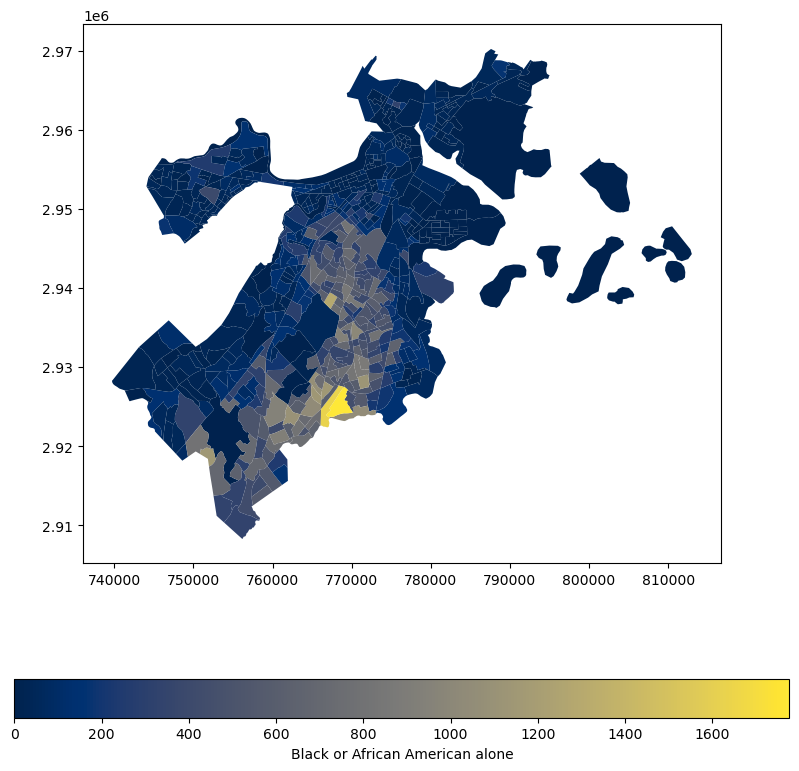

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
census_unique.plot(column="Black or African American alone", ax=ax, legend=True, cmap="cividis",\
                     legend_kwds={'label': "Black or African American alone",
                         'orientation': "horizontal"})

In [7]:
census_unique.columns

Index(['geoid20', 'countyfp20', 'namelsad20', 'statefp20', 'bgid', 'tractce20',
       'intptlat20', 'funcstat20', 'intptlon20', 'blkgrpce20', 'mtfcc20',
       'aland20', 'awater20', 'objectid', 'geometry', 'field concept',
       'State/US-Abbreviation (USPS)', 'Summary Level',
       'Geographic Record Identifier', 'Geographic Code Identifier', 'Region',
       'Division', 'State (FIPS)', 'County (FIPS)',
       'County Subdivision (FIPS)', 'Census Tract', 'Block Group',
       'GEOID 2020 block group', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:',
       'Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'Other institutional facilities', 'Noninsti

In [8]:
total = 'Total:'
race_cols = [ 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:']
# normalize ? ratios or total numbers
n = len(race_cols)
n

8

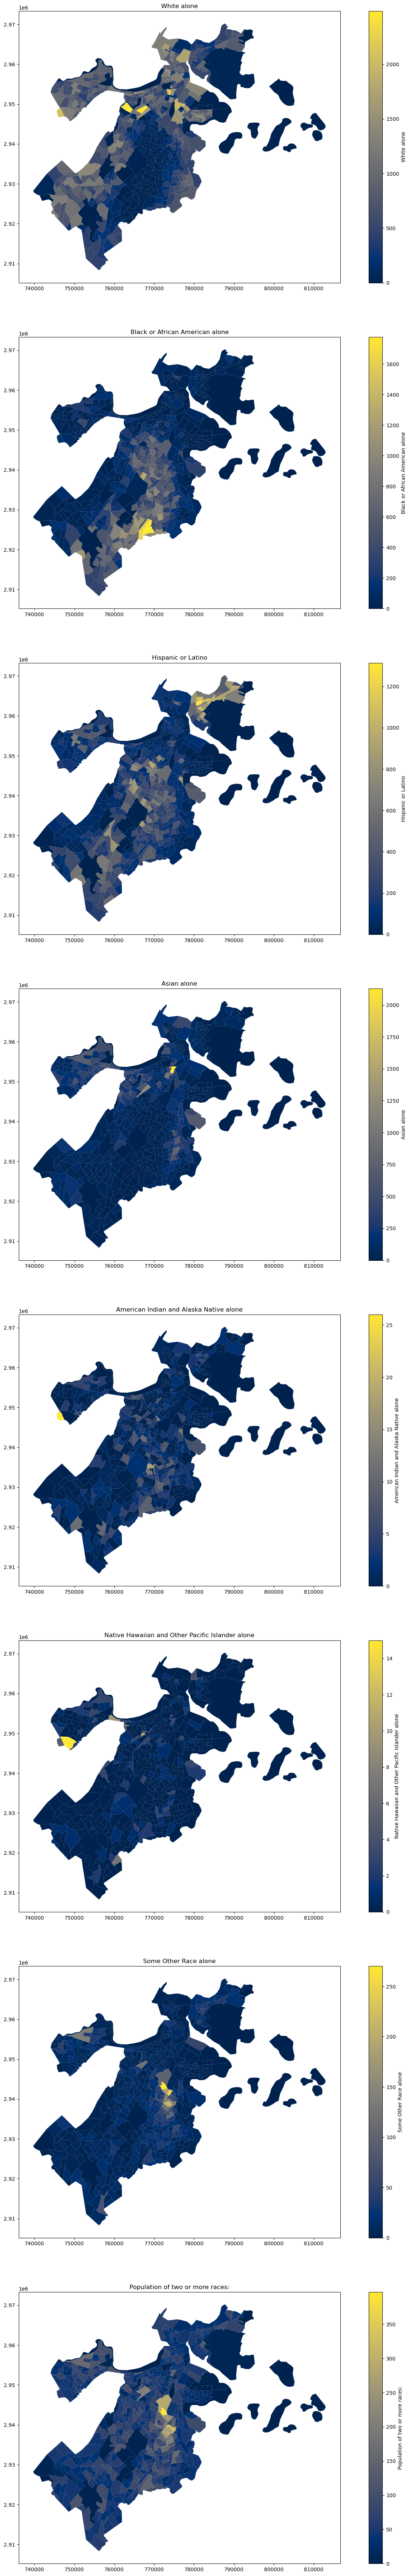

In [9]:
fig, axes = plt.subplots(n, 1, figsize=(20, 90))
for i, col in enumerate(race_cols):
    census_unique.plot(column=race_cols[i], ax=axes[i], legend=True, cmap="cividis",\
                     legend_kwds={'label': race_cols[i],
                         'orientation': "vertical"})
    axes[i].set_title(race_cols[i])

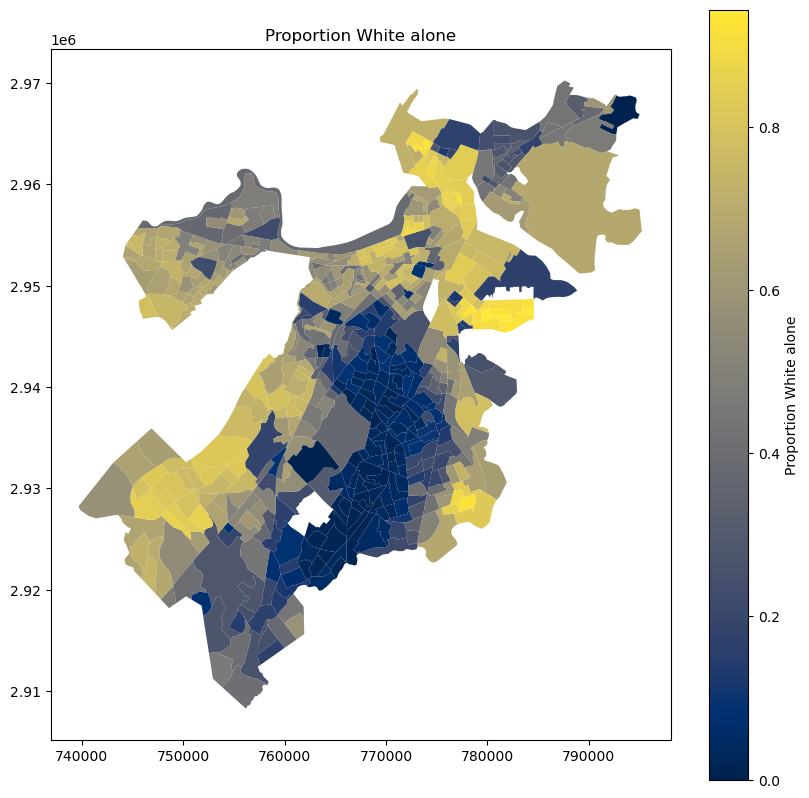

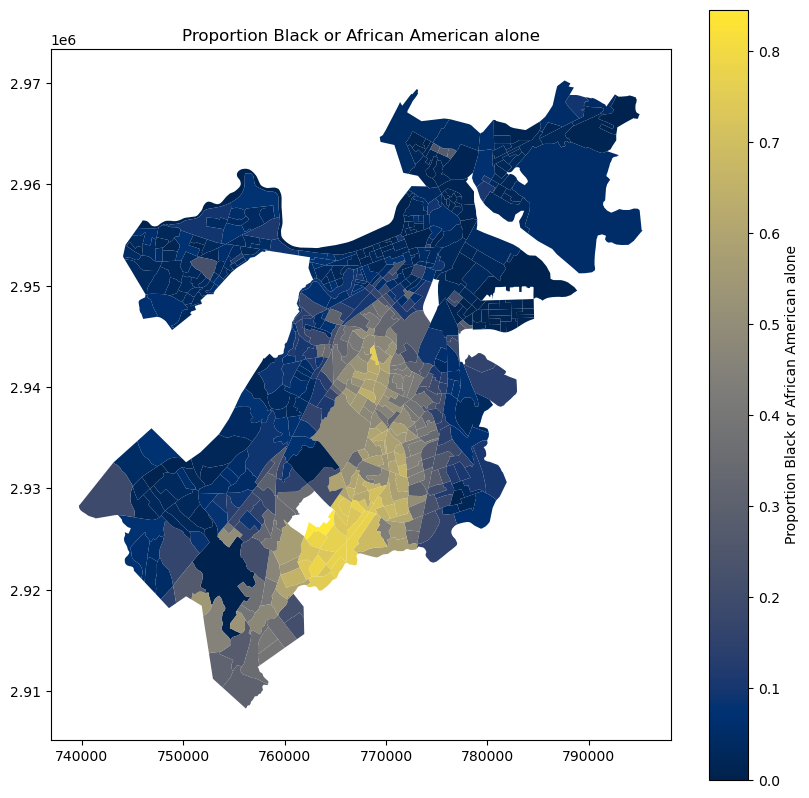

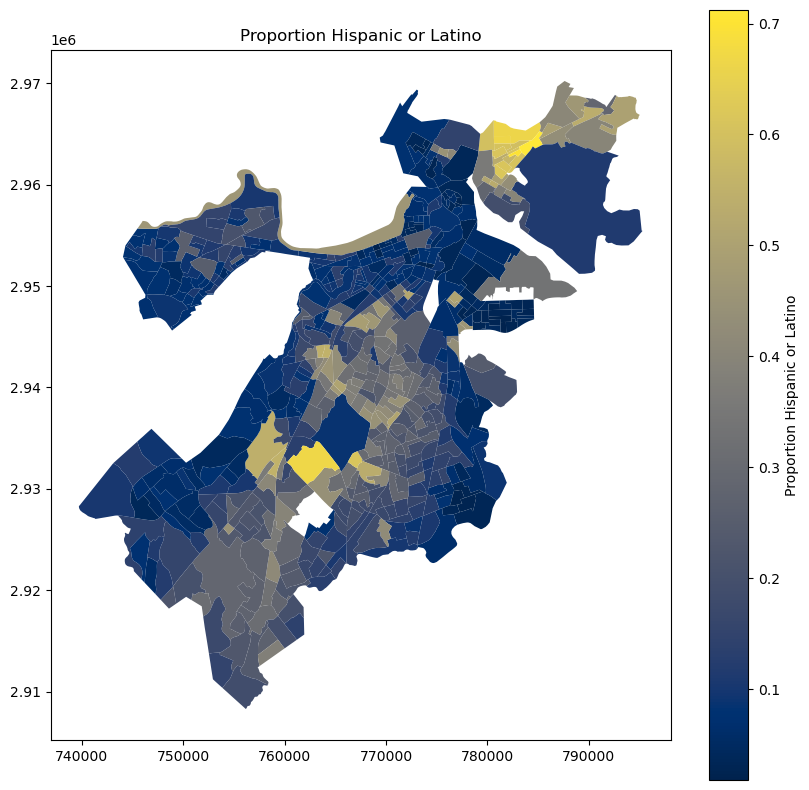

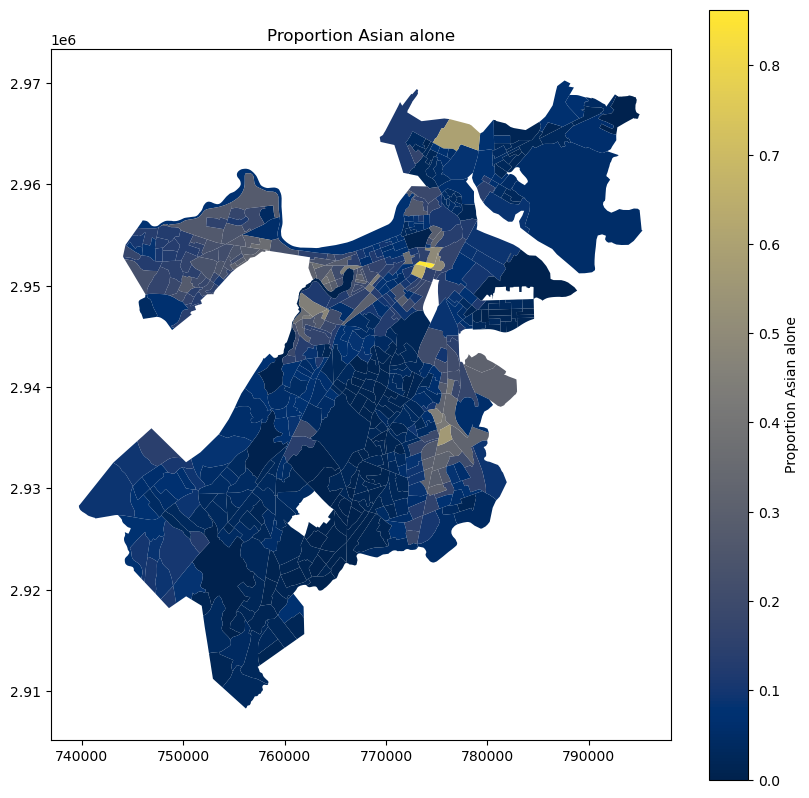

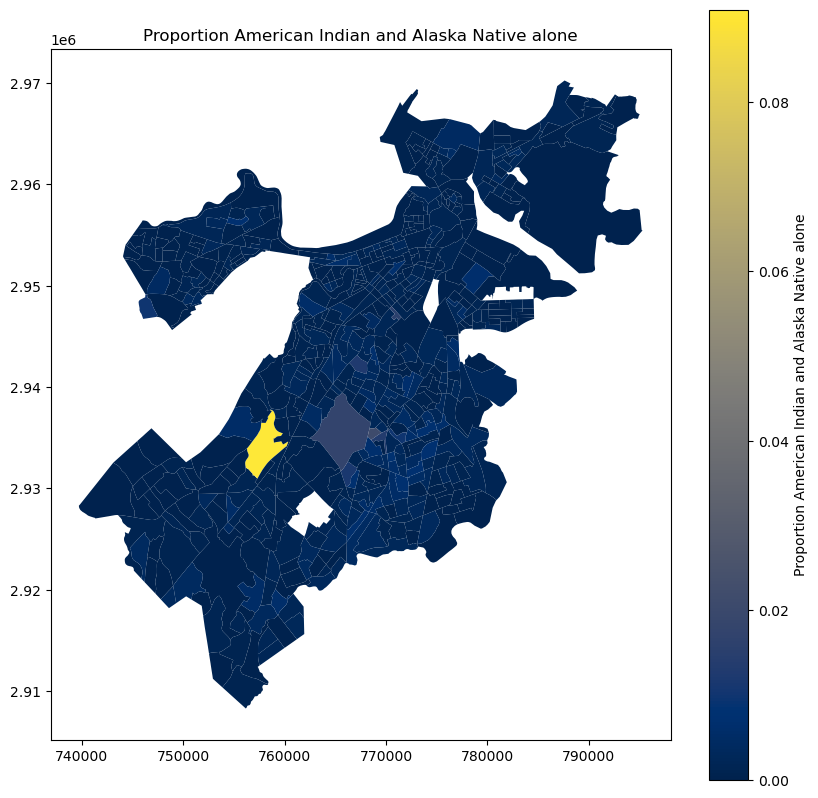

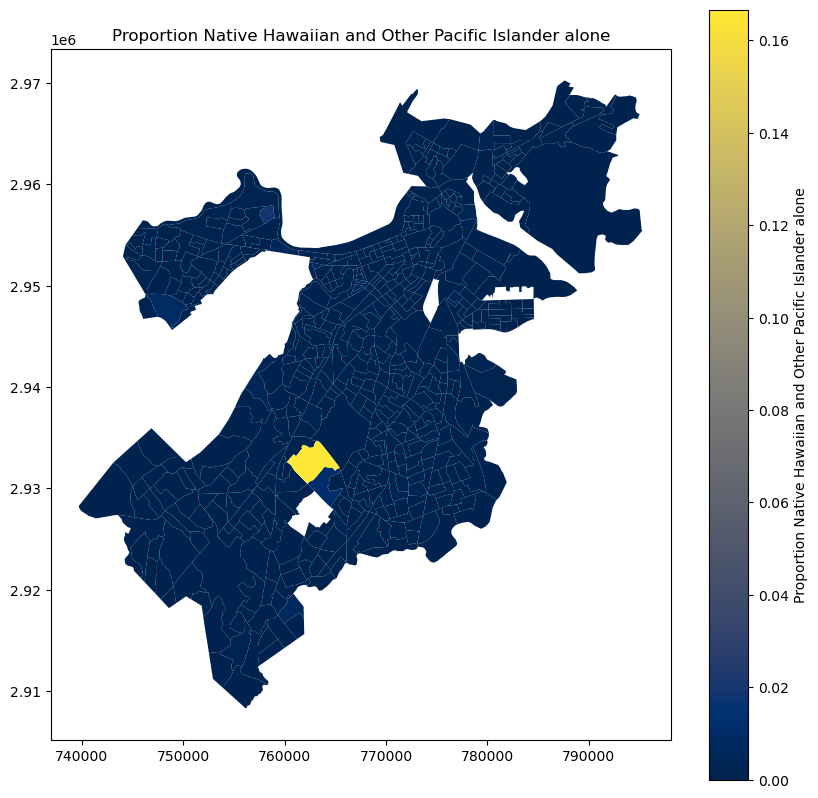

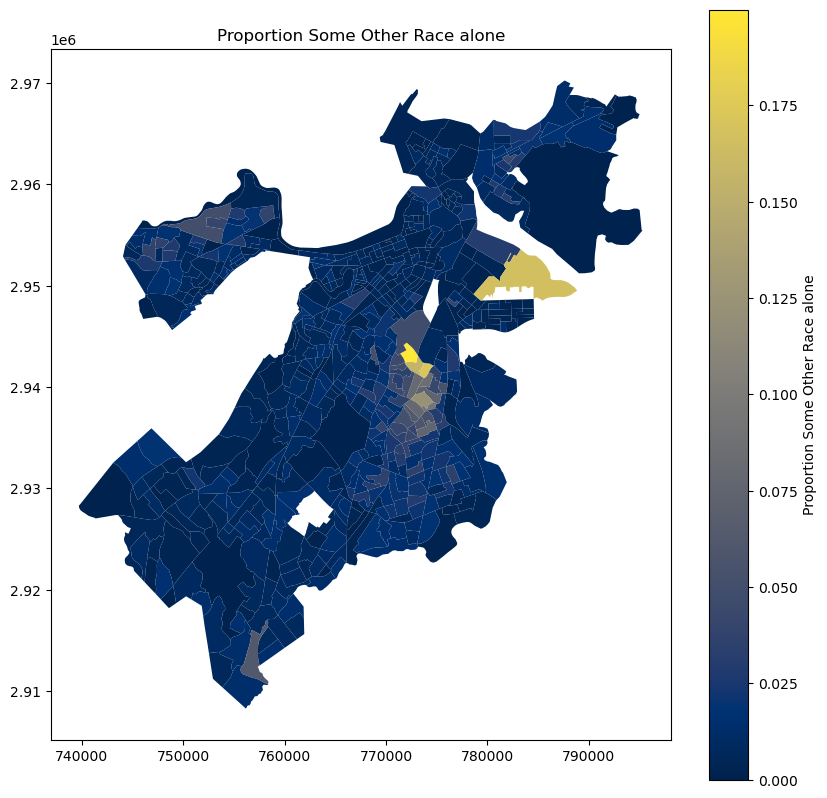

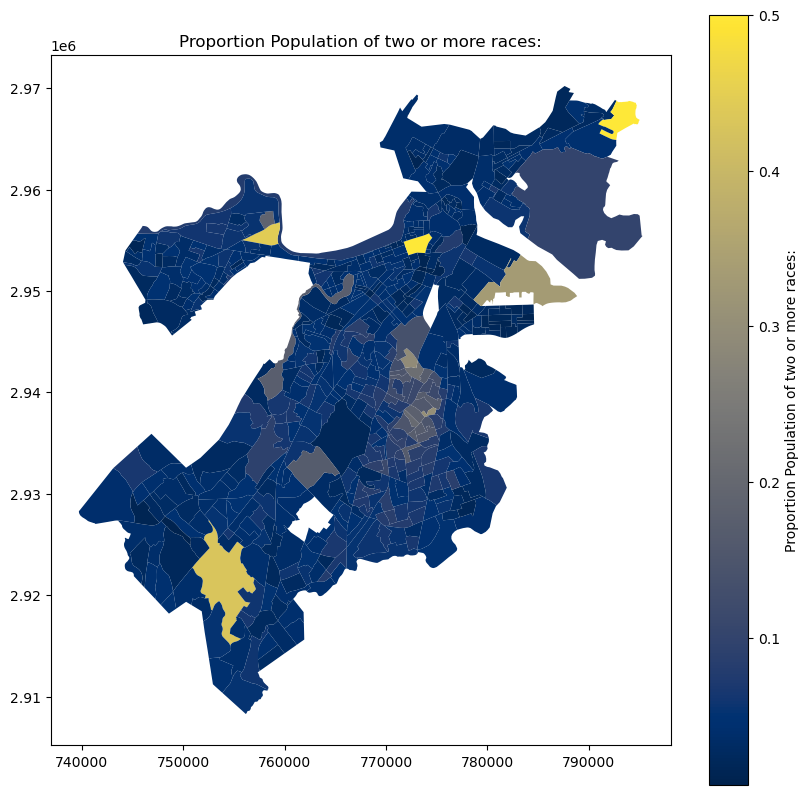

In [10]:
for i, col in enumerate(race_cols):
    census_unique[f"Proportion {col}"] = census_unique[col] / census_unique["Total:"]
normalized_rcols = [f"Proportion {col}" for col in race_cols]
# fig, axes = plt.subplots(n, 1, figsize=(25, 100))
for i, col in enumerate(normalized_rcols):
    fig, ax = plt.subplots(figsize=(10, 10))
    census_unique.plot(column=normalized_rcols[i], ax=ax, legend=True, cmap="cividis",\
                     legend_kwds={'label': normalized_rcols[i],
                         'orientation': "vertical"})
    ax.set_title(normalized_rcols[i])


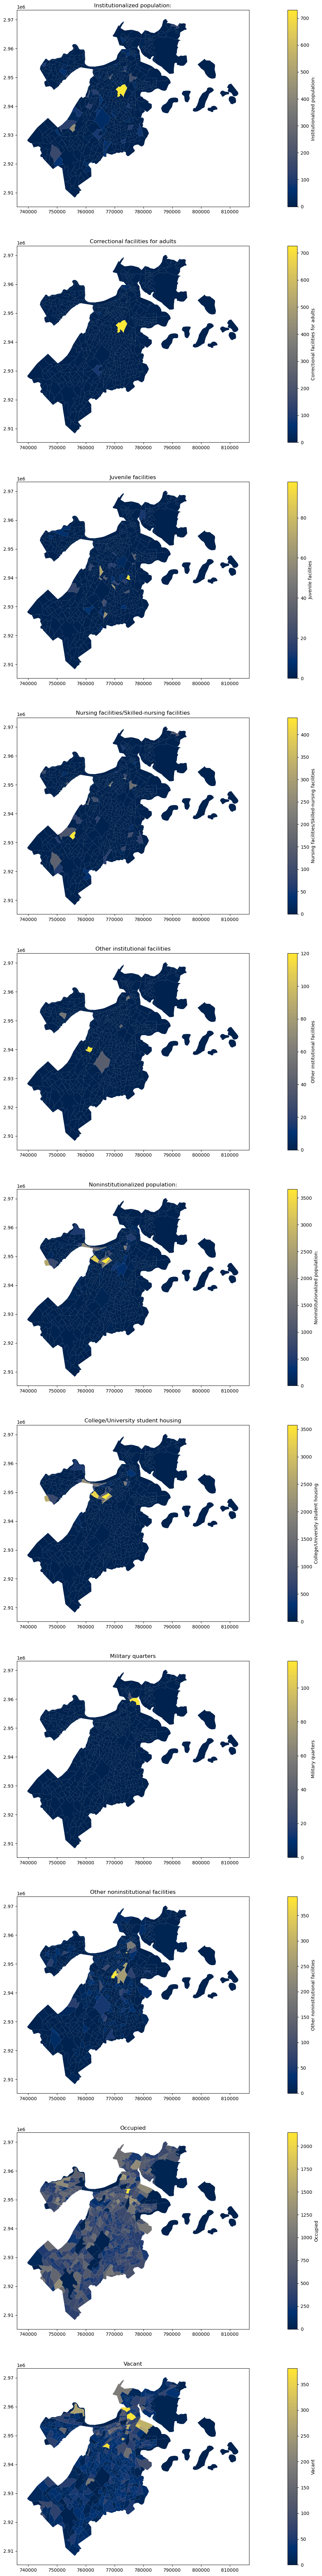

In [11]:
other_cols = ['Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'Other institutional facilities', 'Noninstitutionalized population:',
       'College/University student housing', 'Military quarters',
       'Other noninstitutional facilities', 'Occupied', 'Vacant']
k = len(other_cols)
fig, axes = plt.subplots(k, 1, figsize=(30, 100))
for i, col in enumerate(other_cols):
    census_unique.plot(column=other_cols[i], ax=axes[i], legend=True, cmap="cividis",\
                     legend_kwds={'label': other_cols[i],
                         'orientation': "vertical"})
    axes[i].set_title(other_cols[i])

#### Cleaning of the census data

In [12]:
census_final = census_unique.copy()

In [13]:
census_final.drop(inplace=True, columns = ['countyfp20', 'namelsad20', 'statefp20', 'bgid', 'tractce20',
       'intptlat20', 'funcstat20', 'intptlon20', 'blkgrpce20', 'mtfcc20',
       'aland20', 'awater20', "field concept", 'State/US-Abbreviation (USPS)', 'Summary Level', "Geographic Code Identifier", "Region", "Division", 'State (FIPS)', 'County (FIPS)', 'County Subdivision (FIPS)',
        'Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'Other institutional facilities', 'Noninstitutionalized population:',
       'College/University student housing', 'Military quarters',
       'Other noninstitutional facilities'])

In [14]:
census_final.rename(columns={"geometry":"Geometry"}, inplace=True) 

In [15]:
census_final.drop(columns=["GEOID 2020 block group"], inplace=True)

In [16]:
census_super_final = census_final[['Geographic Record Identifier', 'Geometry',
       'Census Tract', 'Block Group',  'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:', 'Proportion White alone',
       'Proportion Black or African American alone',
       'Proportion Hispanic or Latino', 'Proportion Asian alone',
       'Proportion American Indian and Alaska Native alone',
       'Proportion Native Hawaiian and Other Pacific Islander alone',
       'Proportion Some Other Race alone',
       'Proportion Population of two or more races:', 'Occupied',
       'Vacant']]

In [17]:
census_super_final["Geographic Record Identifier"]
census_super_final.rename(columns={"Geographic Record Identifier":"Geo Record ID (full)", 
                                  "Population of two or more races:" : "Population of two or more races",
                                  "Proportion Population of two or more races:" : "Proportion Population of two or more races"}, inplace=True) 

C:\Users\lukas\AppData\Local\Temp\ipykernel_9040\1253162895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_super_final.rename(columns={"Geographic Record Identifier":"Geo Record ID (full)",


In [18]:
census_super_final.columns

Index(['Geo Record ID (full)', 'Geometry', 'Census Tract', 'Block Group',
       'White alone', 'Black or African American alone', 'Hispanic or Latino',
       'Asian alone', 'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races',
       'Proportion White alone', 'Proportion Black or African American alone',
       'Proportion Hispanic or Latino', 'Proportion Asian alone',
       'Proportion American Indian and Alaska Native alone',
       'Proportion Native Hawaiian and Other Pacific Islander alone',
       'Proportion Some Other Race alone',
       'Proportion Population of two or more races', 'Occupied', 'Vacant'],
      dtype='object')

In [19]:
census_super_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 22 columns):
 #   Column                                                       Non-Null Count  Dtype   
---  ------                                                       --------------  -----   
 0   Geo Record ID (full)                                         580 non-null    object  
 1   Geometry                                                     580 non-null    geometry
 2   Census Tract                                                 580 non-null    int64   
 3   Block Group                                                  580 non-null    int64   
 4   White alone                                                  580 non-null    int64   
 5   Black or African American alone                              580 non-null    int64   
 6   Hispanic or Latino                                           580 non-null    int64   
 7   Asian alone                                                  58

In [20]:
census_super_final.to_csv("../data/cleaned_census.csv", index=False)